In [252]:
import matplotlib.pyplot as plt
import pandas as pd

# GPU / MEM

In [253]:
folder = 'no_tensorrt'
file = 'gpu_mem'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

In [254]:
yolov8n = yolov8n[0:300]

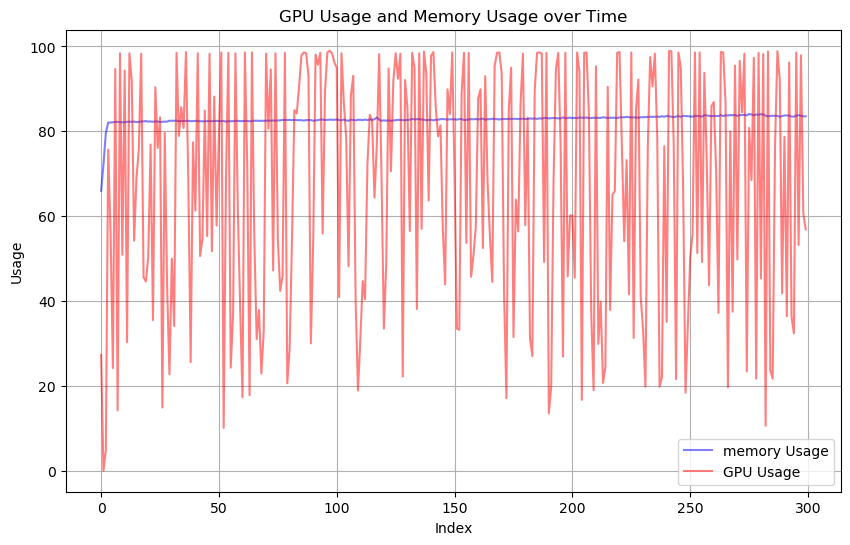

In [255]:
# Extract GPU usage and memory usage columns
gpu_usage = yolov8n['gpu_usage'].to_numpy()
mem_usage = yolov8n['mem_usage'].to_numpy()

# Plot GPU usage vs Memory usage
plt.figure(figsize=(10, 6))
plt.plot(yolov8n.index.to_numpy(), mem_usage, color='blue',label='memory Usage', alpha=0.5)
plt.plot(yolov8n.index.to_numpy(), gpu_usage, color='red',label='GPU Usage', alpha=0.5)
plt.title('GPU Usage and Memory Usage over Time')
plt.xlabel('Index')
plt.ylabel('Usage')
plt.legend()
plt.grid(True)
plt.show()

In [256]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='number', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='number') \
                     .merge(yolov9c, on='number', suffixes=('_yolov8s', '_yolov9c')) \
                     .merge(rtdetrl, on='number', suffixes=('_yolov8s', '_rtdetrl'))
merged_data['gpu_usage_rtdetrl'] = merged_data['gpu_usage']
merged_data['mem_usage_rtdetrl'] = merged_data['mem_usage']
merged_data = merged_data.drop(['number', 'gpu_usage', 'mem_usage'], axis=1).copy()
merged_data = merged_data[0:300]

In [257]:
selected_columns = merged_data.filter(regex='^gpu_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
gpu_usage_yolov8n,300.0,67.380667,28.202549,0.0,43.625,75.95,95.0,99.0
gpu_usage_yolov8m,300.0,83.165000,28.357713,0.0,79.125,99.20,99.3,99.7
gpu_usage_yolov8s,300.0,73.593667,30.327948,0.0,47.875,89.45,98.9,99.3
gpu_usage_yolov9c,300.0,89.053000,22.808677,0.0,98.975,99.30,99.5,99.7
gpu_usage_rtdetrl,300.0,83.495333,28.639275,0.0,80.350,99.15,99.5,99.8


In [258]:
selected_columns = merged_data.filter(regex='^mem_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mem_usage_yolov8n,300.0,82.831396,1.266785,65.986956,82.511047,82.836128,83.295662,84.088875
mem_usage_yolov8m,300.0,87.667208,1.326094,70.246765,87.609337,87.826988,87.963159,88.378775
mem_usage_yolov8s,300.0,84.085341,1.287600,68.330147,83.656522,84.330733,84.607059,85.436012
mem_usage_yolov9c,300.0,86.997504,1.393506,68.812027,86.927275,87.259892,87.400440,87.806411
mem_usage_rtdetrl,300.0,90.314025,2.076609,73.106908,89.336245,89.776737,91.645557,94.266713


# FPS

In [259]:
file = 'fps'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

In [260]:
yolov9c

,no,fps
0,1,0.151988
1,2,6.992138
2,3,7.008366
3,4,7.263682
4,5,7.303218
...,...,...
366,367,7.086433
367,368,6.942810
368,369,7.141368
369,370,7.095352


In [261]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='no', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='no') \
                     .merge(yolov9c, on='no', suffixes=('_yolov8s', '_yolov9c')) \
                     .merge(rtdetrl, on='no', suffixes=('_yolov8s', '_rtdetrl'))
merged_data['fps_rtdetrl'] = merged_data['fps']
merged_data = merged_data.drop(['no', 'fps'], axis=1).copy()
merged_data = merged_data[0:300]

In [262]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_yolov8n,300.0,21.001061,2.202368,0.219196,20.356822,21.511802,22.200634,24.582722
fps_yolov8m,300.0,8.858131,0.667972,0.167965,8.723545,8.994042,9.173332,9.567648
fps_yolov8s,300.0,14.926211,1.465819,0.190868,14.588353,15.185671,15.756777,16.583324
fps_yolov9c,300.0,6.982874,0.524280,0.151988,6.839124,7.143723,7.259558,7.501348
fps_rtdetrl,300.0,3.577090,0.662010,0.131176,3.448073,3.854281,4.008516,4.181283


In [263]:
merged_data.mean(axis=0)

fps_yolov8n    21.001061
fps_yolov8m     8.858131
fps_yolov8s    14.926211
fps_yolov9c     6.982874
fps_rtdetrl     3.577090
dtype: float64

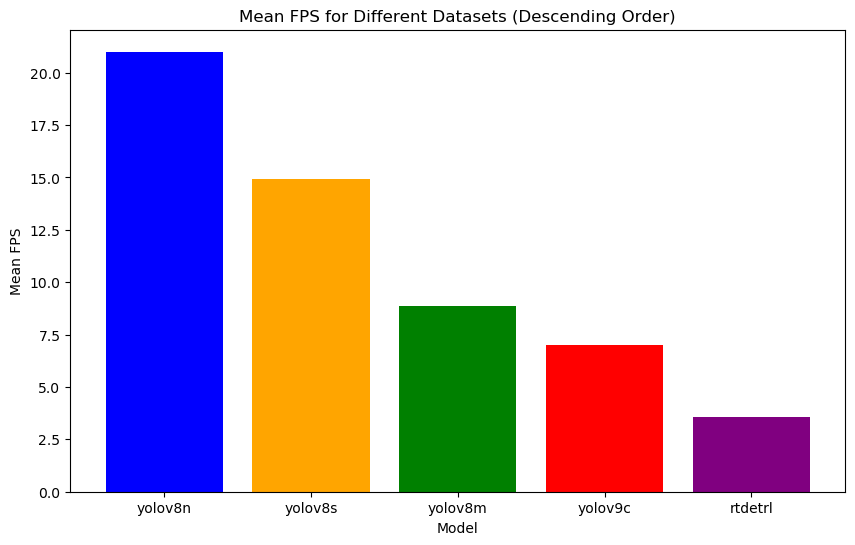

In [264]:
mean_fps = {
    'yolov8n': merged_data['fps_yolov8n'].mean(),
    'yolov8m': merged_data['fps_yolov8m'].mean(),
    'yolov8s': merged_data['fps_yolov8s'].mean(),
    'yolov9c': merged_data['fps_yolov9c'].mean(),
    'rtdetrl': merged_data['fps_rtdetrl'].mean()
}

# Sort mean FPS values in descending order
sorted_mean_fps = dict(sorted(mean_fps.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_mean_fps.keys(), sorted_mean_fps.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean FPS for Different Datasets (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Mean FPS')
plt.show()

# Latency

In [269]:
file = 'latency'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv', header=None)
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv', header=None)
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv', header=None)
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv', header=None)
rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv', header=None)

In [284]:
yolov8s.loc(0)

In [279]:
mean_fps = {
    'yolov8n': yolov8n[0],
    'yolov8m': yolov8m[0],
    'yolov8s': yolov8s[0],
    'yolov9c': yolov9c[0],
    'rtdetrl': rtdetrl[0]
}

# Sort mean FPS values in descending order
sorted_mean_fps = dict(sorted(mean_fps.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_mean_fps.keys(), sorted_mean_fps.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Latency for Different Datasets (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Latency')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().